## Adult Income Data Analysis Study and Visaulizations

In this exercise, we will explore the factors related to adult income. To do this, we will ask a series of questions, and use data visualization to provide insight into the solution. 

In [9]:
# import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [5]:
# read in our data set
path = "/Users/student/Desktop/SpringBoardDSCareerTrack/Adult Income Data Story Telling"
os.chdir(path)
adult_income = pd.read_csv('Adult.csv')
adult_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
# Use info() to check out the feature data types
adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Question 1: What are top 5 occupations for those who make more than 50K or those who make less than 50K annually?

In [14]:
fifty_K_more = adult_income[adult_income['income']== '>50K']
fifty_K_less = adult_income[adult_income['income']== '<=50K']

In [20]:
#defaulter.groupby('manufacturer_id')['manufacturer_id'].count().sort_values(ascending=False).head()
fifty_K_more.groupby('occupation')['occupation'].count().sort_values(ascending=False).head()

occupation
Exec-managerial    2908
Prof-specialty     2784
Sales              1475
Craft-repair       1383
Adm-clerical        768
Name: occupation, dtype: int64

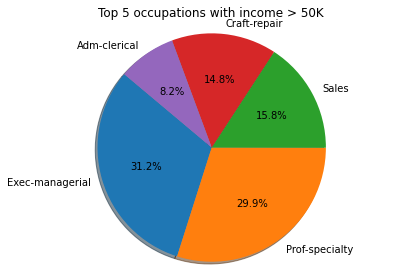

In [39]:
labels = ['Exec-managerial', 'Prof-specialty', 'Sales', 'Craft-repair', 'Adm-clerical']
sizes = [2908, 2784, 1475, 1383, 768]
plt.pie(sizes, autopct='%1.1f%%', labels=labels, shadow=True, startangle = 140)
plt.axis('equal')
plt.title('Top 5 occupations with income > 50K')
plt.tight_layout()
plt.show()

In [34]:
fifty_K_less.groupby('occupation')['occupation'].count().sort_values(ascending=False).head()

occupation
Adm-clerical      4843
Craft-repair      4729
Other-service     4719
Sales             4029
Prof-specialty    3388
Name: occupation, dtype: int64

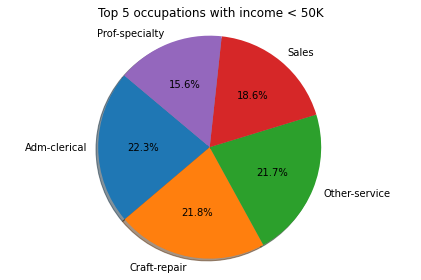

In [36]:
labels = ['Adm-clerical', 'Craft-repair', 'Other-service', 'Sales', 'Prof-specialty']
sizes = [4843, 4729, 4719, 4029, 3388]
plt.pie(sizes, autopct='%1.1f%%', labels=labels, shadow=True, startangle = 140)
plt.axis('equal')
plt.title('Top 5 occupations with income < 50K')
plt.tight_layout()
plt.show()

### Question 2: What is the average age for those who make more than 50K? Less than 50K?

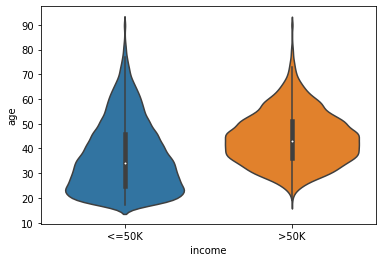

In [49]:
sns.violinplot(x = 'income', y='age', data= adult_income)

### Question 3: How many years of education is required to make more than 50K a year? Does it differ by gender?

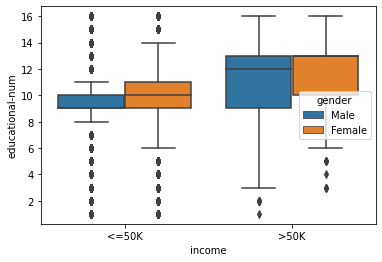

In [47]:
sns.boxplot(x = 'income', y='educational-num', hue='gender', data= adult_income)

### Question 4: What is capital gain and loss for both income levels?

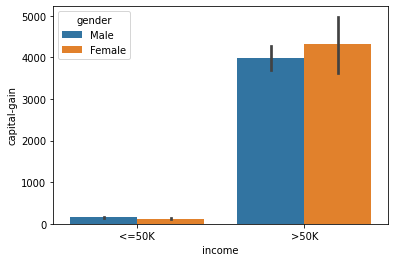

In [70]:
sns.barplot(x = 'income', y='capital-gain', hue='gender', data= adult_income)

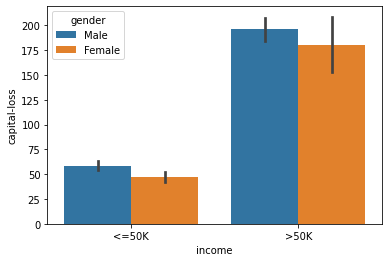

In [71]:
sns.barplot(x = 'income', y='capital-loss', hue='gender', data= adult_income)

### Question 5: For each race, what percentage make more than 50K a year? 

/Users/student/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


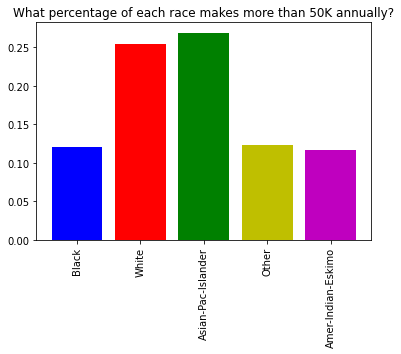

In [88]:
# For each race, add the respective percentage of those making more than 50K annually
morethan_50K = []
for status in list(adult_income['race'].unique()):
    current = adult_income[adult_income['race']==status]
    morethan_50K.append(current[current['income']=='>50K']['income'].count() / len(current))

plt.bar(list(adult_income['race'].unique()), morethan_50K, color='brgym')
plt.xticks(rotation='vertical')
# barlist[0].set_color('b'); barlist[1].set_color('r'); barlist[2].set_color('g'); barlist[3].set_color('y')
plt.title('What percentage of each race makes more than 50K annually?')
plt.show()

### Question 6: How does marital status affect income for both genders?

In [108]:
# Separate dataset into male and female
male = adult_income[adult_income['gender']=='Male']
female = adult_income[adult_income['gender']=='Female']

# For each male marital status, add the respective percentage of those who make more than
# 50 K annually
morethan_50K_male = []
for status in list(male['marital-status'].unique()):
    current = male[male['marital-status']==status]
    morethan_50K_male.append(current[current['income']=='>50K']['income'].count() / len(current))

# For each female marital status, add the respective percentage of those who make more than
# 50 K annually
morethan_50K_female = []
for status in list(female['marital-status'].unique()):
    current = female[female['marital-status']==status]
    morethan_50K_female.append(current[current['income']=='>50K']['income'].count() / len(current))

# As the order of unique male and female marital statuses do not match, we rearranged the values
# for the female marital status percentages to match that of the male list
morethan_50K_female[2], morethan_50K_female[4] = morethan_50K_female[4], morethan_50K_female[2]
morethan_50K_female[4], morethan_50K_female[5] = morethan_50K_female[5], morethan_50K_female[4]

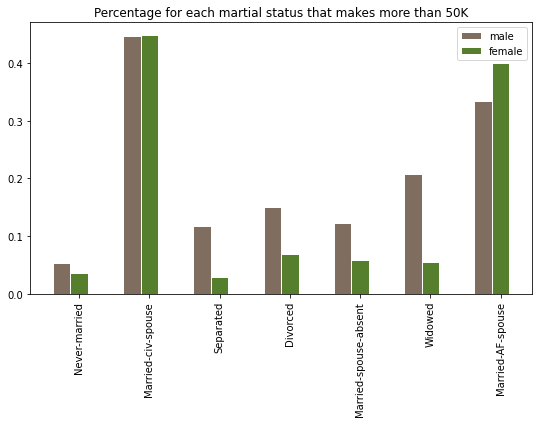

In [116]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = morethan_50K_male
bars2 = morethan_50K_female
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.figure(figsize=(9,5))
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='male')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='female')
 
# Add xticks on the middle of the group bars
plt.xlabel('', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list(male['marital-status'].unique()), rotation='vertical')
plt.title('Percentage for each martial status that makes more than 50K')
 
# Create legend & Show graphic
plt.legend()
plt.show()